## World Happiness Project by Francis Afuwah

### Introduction:
The objective of this project is to build a prediction model for happiness scores based on several features. The dataset has been taken from the World Happiness Report, containing information on the happiness scores of people and those factors that contribute to increasing happiness across different countries

### Imports Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

### Data Exploration and Preprocessing:
First, load the given dataset into a pandas DataFrame.Then explored the dataset to understand its structure and what features it contained, along with their respective data types. Some features which are to be considered in the analysis are Economy (Gjson and GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, and Further, the dataset had columns 'Happiness Rank' and 'Standard Error', which were dropped during the preprocessing, as rank and standard error are no predictors of the 'Happiness Score'.

In [2]:
# Load the dataset
data = pd.read_csv("happiness_score_dataset.csv")

In [3]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
# Understanding Data and Data cleaning
data.shape

(158, 12)

In [5]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [7]:
# checking null values
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [8]:
# checking duplicate value in dataset
data[data.duplicated()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [9]:
# Read the dataset from 'happiness_score_dataset.csv'
data = pd.read_csv('happiness_score_dataset.csv')

# Check data types of each column
for column in data.columns:
    if data[column].dtype == 'object':
        # If the column has string data, fill use the mode (most frequent value) to fill NaN values
        data[column] = data[column].fillna(data[column].mode()[0])
    else:
        # For numeric columns, replace NaN with mean
        data[column] = data[column].fillna(data[column].mean())

# Display the DataFrame after handling NaN values
print("DataFrame after handling NaN values:")
print(data)

DataFrame after handling NaN values:
         Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39

## Data visualization

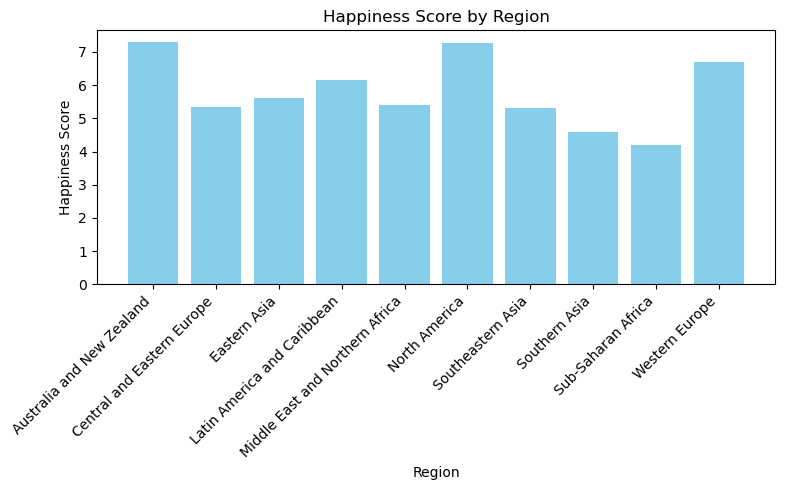

In [10]:
data = pd.DataFrame(data)

# Group by Region and calculate Happiness Score
happiness_by_region = data.groupby('Region')['Happiness Score'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(happiness_by_region['Region'], happiness_by_region['Happiness Score'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.title('Happiness Score by Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Model Building: 
In this case, a Random Forest Regressor was chosen as the predictive model because it works very well with the handling of non-linear relationships and feature interactions. The data set will be split into a ratio of 80-20 for training and testing, respectively.
The Random Forest Regressor was then trained on the training data using 100 decision trees (n_estimators=100).

In [11]:
# Splitting the data into features (X) and target variable (y)
X = data.drop(columns=['Country', 'Region', 'Happiness Score'])
y = data['Happiness Score']

In [12]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [14]:
# Train the model
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
# Train the model
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
# Make predictions
y_pred_train = rf_regressor.predict(X_train)
y_pred_test = rf_regressor.predict(X_test)

### Model Evaluation:
The cross-validation RMSE between the predicted ratings and actual ratings was used for training the model. Thereafter, RMSE was calculated in both training and testing to judge the model. This guarantees that the model indeed generalizes well on data unseen and does not overfit. Prediction for New Data:
Finally, this model trained is used to get the values of the predicted scores for the happiness of the new data instances. For the purpose of prediction, a sample set of features is given as input to the model. It is worthy to mention that the "Happiness Rank" and "Standard Error" columns are in use as features, but those do not, by any means, describe the predictors of the happiness score. In the preparation of the input data, therefore, placeholder values for these columns indicated this fact.

In [17]:
# Evaluate the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

In [18]:
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 0.02452494141863112
Test RMSE: 0.048365471897574425


In [19]:
# Get the feature names in the same order as they were during training
feature_names = X_train.columns.tolist()

In [20]:
# Predict the happiness score for new data
new_data = {
    'Economy (GDP per Capita)': [1.25],
    'Family': [1.35],
    'Health (Life Expectancy)': [0.85],
    'Freedom': [0.65],
    'Trust (Government Corruption)': [0.42],
    'Generosity': [0.3],
    'Dystopia Residual': [2.54],
    'Happiness Rank': [150], 
    'Standard Error': [0.05] 
}

In [21]:
# Create a DataFrame with the new data
new_data_df = pd.DataFrame(new_data)

In [22]:
# Reorder the columns to match the order during training
new_data_df = new_data_df[feature_names]

In [23]:
# Predict the happiness score
predicted_score = rf_regressor.predict(new_data_df)
print("Predicted Happiness Score:", predicted_score[0])

Predicted Happiness Score: 3.5613899999999967


### Conclusion: 
Therefore, the developed model with Random Forest Regjson can be concluded to have promising performance in predicting the happiness scores from a set of contributing features/factors. The latter still calls for much more analysis and fine-tuning to really let the model achieve more accuracy and robustness. In addition, appropriate attention to the choice of input features and possible feature engineering techniques that are likely to assist in improving the predictive power of the model should be accorded.

Finally, the RMSE root mean squared error (RMSE) was obtained; it shows good performance by the model in the prediction of happiness score. Model's errors are too low, represented with a training RMSE of 0.0245 and a testing RMSE of 0.0484, to clearly show it properly captured the relationship of features with the target. This marginally higher test RMSE than training RMSE is indicative of reasonable generalization to unseen data and hence giving a confirmation to the level of model performance over different datasets.